<a href="https://colab.research.google.com/github/AlanItzep/Data-Analysis/blob/master/basicClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels)=fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

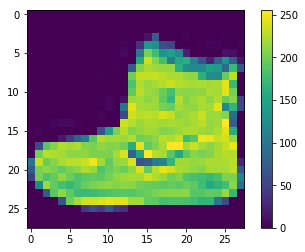

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images=train_images/255.0
test_images=test_images/255.0

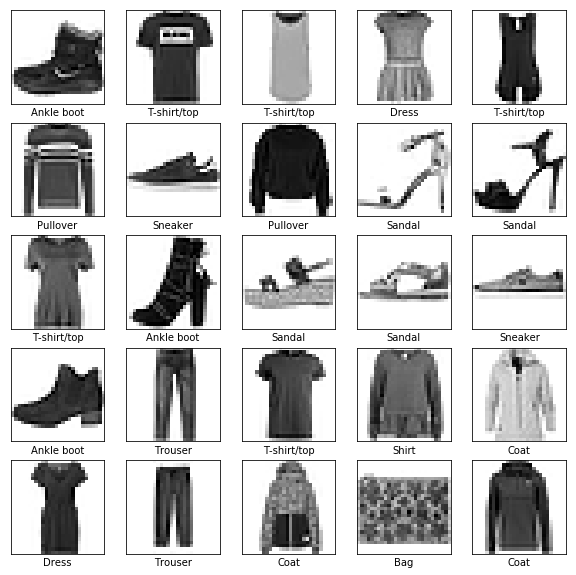

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
])

W0710 21:32:44.981971 139675370207104 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
model.fit(train_images,train_labels,epochs=25)

Epoch 1/25
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4993 - acc: 0.8254
Epoch 2/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3709 - acc: 0.8660
Epoch 3/25
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3334 - acc: 0.8774
Epoch 4/25
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3117 - acc: 0.8851
Epoch 5/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2927 - acc: 0.8910
Epoch 6/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2789 - acc: 0.8967
Epoch 7/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2665 - acc: 0.9006
Epoch 8/25
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2567 - acc: 0.9047
Epoch 9/25
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2465 - acc: 0.9078
Epoch 10/25
60000/60000 [==============================] - 4s 67us/sample - loss: 

In [0]:
test_loss, test_acc =model.evaluate(test_images,test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3804 - acc: 0.8893
Test accuracy:  0.8893


In [0]:
predictions=model.predict(test_images)

In [0]:
predictions[0]

array([4.0159489e-09, 1.2546943e-13, 3.8505799e-10, 6.0277558e-17,
       1.8674328e-13, 1.3551652e-05, 8.9792110e-08, 9.1638946e-04,
       1.4014078e-11, 9.9906999e-01], dtype=float32)

In [0]:
np.argmax(predictions[0])

9

In [0]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


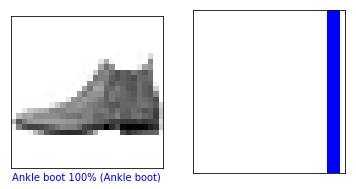

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


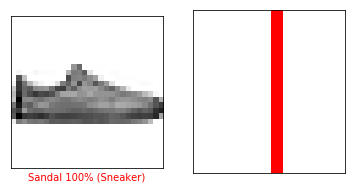

In [0]:
i= 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()

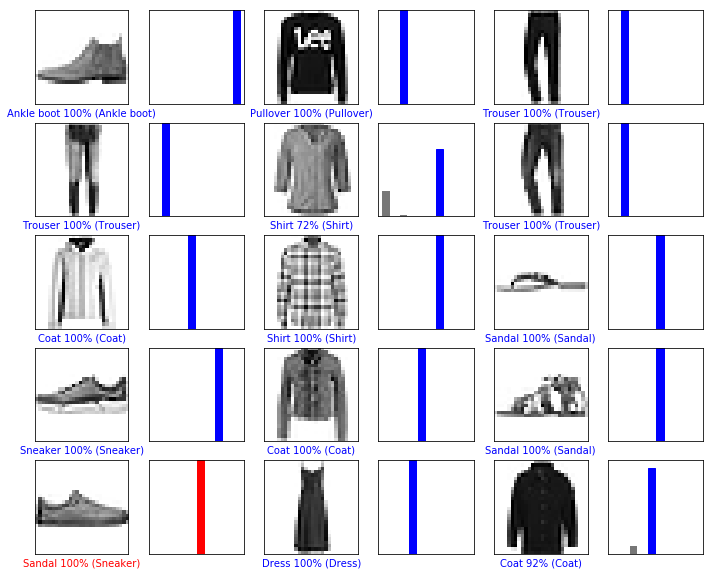

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()


In [0]:
img=test_images[0]
print(img.shape)

(28, 28)


In [0]:
img = (np.expand_dims(img,0))

print(img.shape)


(1, 28, 28)


In [0]:
predictions_single = model.predict(img)

print(predictions_single)


[[4.01596445e-09 1.25469432e-13 3.85057985e-10 6.02777828e-17
  1.86743985e-13 1.35516393e-05 8.97919392e-08 9.16388992e-04
  1.40140234e-11 9.99069989e-01]]


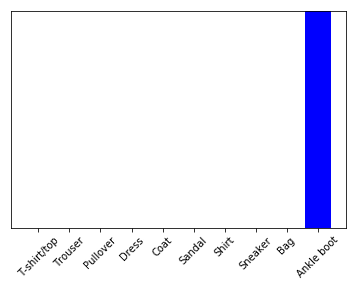

In [0]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()


In [0]:
prediction_result = np.argmax(predictions_single[0])
print(prediction_result)


9
